In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# input data
x = df.drop('Outcome',axis = 1)
# output data
y = df['Outcome']

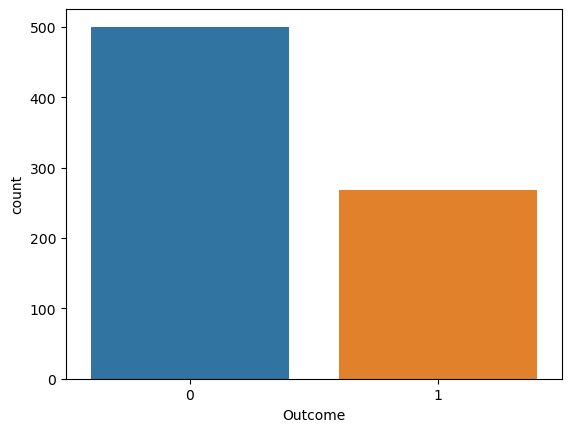

In [6]:
sns.countplot(x = y);

In [7]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [9]:
# cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x, y, random_state = 0 ,test_size = 0.25)

In [10]:
x.shape

(768, 8)

In [11]:
x_train.shape

(576, 8)

In [12]:
x_test.shape

(192, 8)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# create the object
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [17]:
y_pred = knn.predict(x_test)

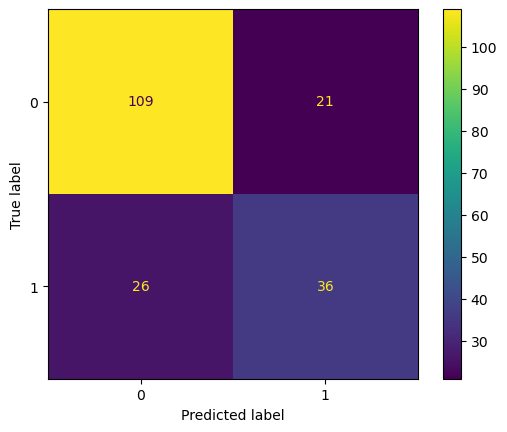

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       130
           1       0.63      0.58      0.61        62

    accuracy                           0.76       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.75      0.76      0.75       192



In [25]:

import matplotlib.pyplot as plt
import numpy as np

In [23]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))


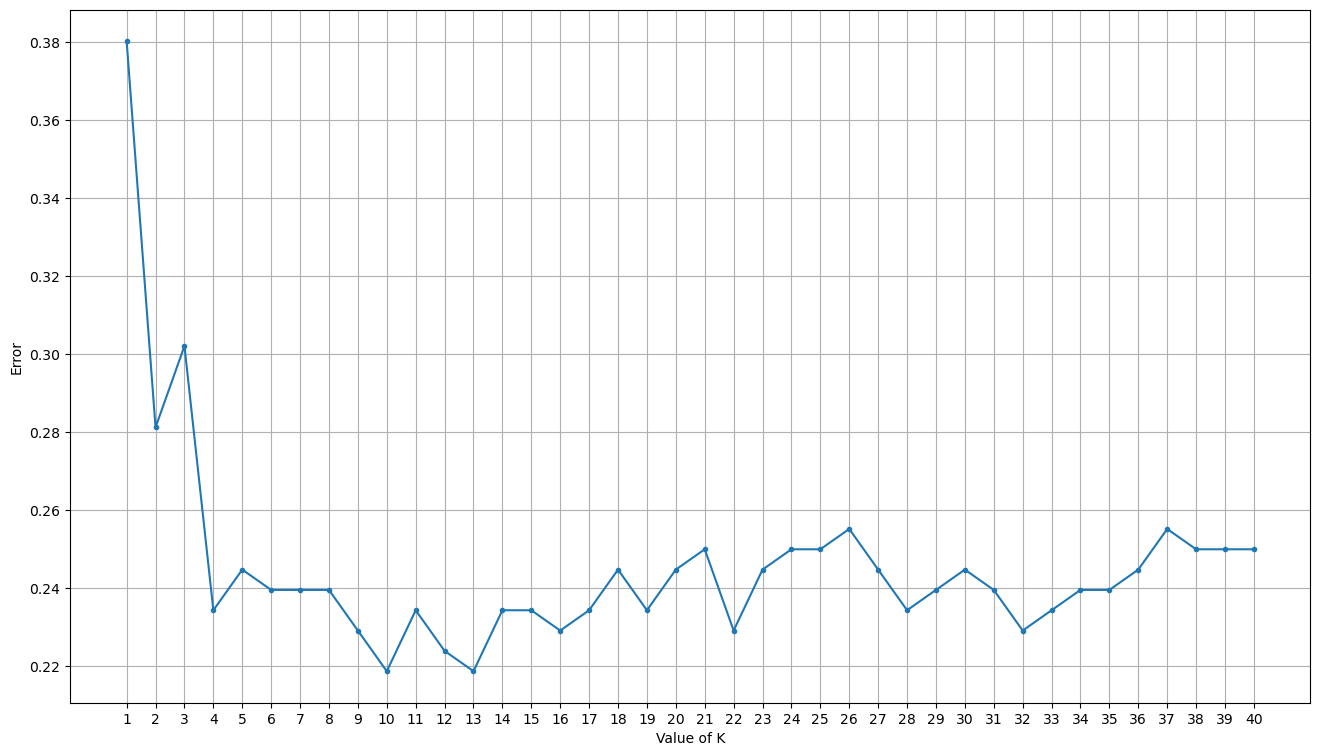

In [26]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.' )

In [27]:
 knn = KNeighborsClassifier(n_neighbors=33)

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [29]:
y_pred = knn.predict(x_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       130
           1       0.71      0.47      0.56        62

    accuracy                           0.77       192
   macro avg       0.74      0.69      0.70       192
weighted avg       0.76      0.77      0.75       192

